<a href="https://colab.research.google.com/github/YOUcanmakeIt/git_2/blob/master/%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%A7%88%EC%9D%B4%EB%8B%9D_05_%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_%EC%9D%91%EC%9A%A9_(KoNLPy_%2B_NLTK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 마이닝 05 - 한국어 자연어처리 응용 (KoNLPy + NLTK)

<img width="40%" src="https://i.imgur.com/AydcsdT.png">
    
***2017-2021 FinanceData.KR http://financedata.kr***

In [ ]:
# 한글 폰트 설치와 폰트 캐시 재설정
!apt-get install -y -qq fonts-nanum
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

# 이 셀을 실행하고, 런타임 재시작 (메뉴의 "런타임 / 런타임 다시 시작...") 후
# 다시 한번 이 셀을 실행합니다.

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

# matplotlib 한글 출력 확인용 테스트
plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.title('한글 테스트')

# Read documents

특정 분야 뉴스 텍스트 수집

In [ ]:
!pip install feedparser
!pip install newspaper3k

In [ ]:
import feedparser
import newspaper

# 경향신문 경제뉴스 RSS
rss_link = 'https://www.khan.co.kr/rss/rssdata/economy_news.xml'

feeds = feedparser.parse(rss_link)
links = [entry['link'] for entry in feeds['entries']]

news_text =''
for link in links:
    print(link)
    article = newspaper.Article(link, language='ko')
    article.download()
    article.parse()
    news_text += article.text

In [ ]:
print(len(news_text))
print('-' * 120)
news_text[:1000]

47153
------------------------------------------------------------------------------------------------------------------------


'삼성전자가 패션 브랜드 톰브라운과 함께 만든 폴더블폰 한정판 응모에 9시간 만에 46만명이 몰린 것으로 나타났다.\n\n\n\n15일 삼성전자는 지난 12일 오전 9시부터 오후 6시까지 삼성닷컴 홈페이지에서 진행한 ‘갤럭시Z 폴드3·플립3 톰브라운 에디션’ 한정 판매 추첨에 총 46만명이 참여했다고 밝혔다.\n\n\n\n이번 톰브라운 에디션 한정판 응모자 수는 전작(갤럭시Z폴드2)에 비해 약 2배 많았다. 이번엔 폴드3과 플립3의 두 제품 응모를 동시에 진행한 영향도 컸다. 삼성전자는 “전작의 응모 시간이 33시간이었던 데 비하면 호응이 훨씬 컸던 셈”이라며 “최초 9시간 기준으로는 응모자 수가 약 3.5배”라고 밝혔다. 두 제품 중 플립3에 대한 응모가 조금 더 많았던 것으로 파악됐다.\n\n\n\n톰브라운 에디션에는 이번 폴더블폰과 함께 출시되는 갤럭시워치4, 갤럭시버즈2를 비롯해 무선충전기, 가죽 케이스, S펜(폴드3만 해당)이 포함됐다. 제품마다 톰브라운 특유의 시그니처 디자인이 적용됐다. 폴드3은 396만원, 플립3은 259만5000원이다. 업계 관계자는 “전작 폴더블폰의 톰브라운 에디션은 실구매가에서 50만~100만원의 프리미엄이 붙어 팔리기도 했다”며 “이번 제품 역시 세련된 디자인에 한정판이라는 희귀성을 가진 데다 프리미엄 차익을 보려는 수요가 몰리면서 호응이 컸던 것 같다”고 말했다.\n\n\n\n삼성전자는 지난 13일 톰브라운 에디션 당첨자에게 당첨 사실을 알렸고, 오는 27일부터 제품을 배송할 예정이다. 삼성전자는 이번에 톰브라운 에디션을 몇 대나 판매했는지는 공개하지 않았다.\n\n\n\n톰브라운 에디션이 아닌 일반 폴드3, 플립3의 사전판매는 17일부터 23일까지 진행된다.\n\n내달 10일부터 출발과 도착 공항이 다른 새로운 형태의 국제관광비행이 운행한다.\n\n\n\n15일 국토교통부에 따르면 다음달 10일 에어부산은 김해공항을 출발해 제주공항으로 향하는 국제관광비행 항공편을 띄울 예정이다. 이어 11일 김포~김해(에어부산), 17

## Tokenize

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Komoran

engine = Komoran() 
news_tokens = engine.nouns(news_text)

In [ ]:
print(news_tokens[:100])

['삼성전자', '패션', '브랜드', '톰', '브라운', '폴', '더블', '폰', '한정판', '응모', '시간', '만', '명', '것', '일', '삼성전자', '일', '오전', '시', '오후', '시', '삼성', '닷', '컴', '홈페이지', '진행', '갤럭시', '폴', '드', '플립', '톰', '브라운', '에디션', '한정', '판매', '추첨', '명', '참여', '이번', '톰', '브라운', '에디션', '한정판', '응모자', '수', '전작', '갤럭시', '폴', '드', '배', '이번', '폴', '드', '플립', '제품', '응모', '동시', '진행', '영향', '삼성전자', '전', '작의', '응모', '시간', '시간', '데', '호응', '셈', '최초', '시간', '기준', '응모자', '수', '배', '제품', '중', '플립', '응모', '것', '파악', '톰', '브라운', '에디션', '이번', '폴', '더블', '폰', '출시', '갤럭시', '워치', '갤럭시', '버즈', '무선', '충전기', '가죽', '케이스', '펜', '폴', '드', '해당']


## 불용어(Stop words) 제거

In [ ]:
import requests

r = requests.get('https://bit.ly/3CTV3QT')
stop_words = r.text.split()
len(stop_words)

789

In [ ]:
stop_words[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

In [ ]:
print('불용어 처리전 단어수:', len(news_tokens))

result = []
for w in news_tokens:
    if w not in stop_words:
        result.append(w)

print('불용어 처리후 단어수:', len(result))

불용어 처리전 단어수: 9226
불용어 처리후 단어수: 8423


In [ ]:
# 2글자 이상 단어만 (선택적)
news_tokens = [w for w in result if len(w) > 1]

In [ ]:
# 가장 많이 등장하는 명사 TOP 20
from collections import Counter

count = Counter(news_tokens)
count.most_common(20)

[('주택', 47),
 ('만원', 46),
 ('사업', 46),
 ('업체', 45),
 ('수수료', 43),
 ('중개', 42),
 ('숙련', 41),
 ('포인트', 39),
 ('플러스', 38),
 ('경우', 37),
 ('코로나', 36),
 ('감소', 36),
 ('판매', 35),
 ('기준', 35),
 ('19', 34),
 ('소비자', 32),
 ('지난해', 31),
 ('서비스', 31),
 ('친환경', 31),
 ('일자리', 31)]

## nltk.Text() 분석

참고 http://www.nltk.org/api/nltk.html#nltk.text.Text

In [ ]:
import nltk
news = nltk.Text(news_tokens)

In [ ]:
print(len(news.tokens)) # 토큰 개수
print(len(set(news.tokens))) # 고유한 토큰 개수

7385
1847


## 빈도 분포 FreqDist

In [ ]:
freq_dist = news.vocab() # FreqDist (빈도 분포)
print(len(freq_dist))

1847


In [ ]:
print(freq_dist.most_common(50)) # 가장 많이 등장하는 50개

[('주택', 47), ('만원', 46), ('사업', 46), ('업체', 45), ('수수료', 43), ('중개', 42), ('숙련', 41), ('포인트', 39), ('플러스', 38), ('경우', 37), ('코로나', 36), ('감소', 36), ('판매', 35), ('기준', 35), ('19', 34), ('소비자', 32), ('지난해', 31), ('서비스', 31), ('친환경', 31), ('일자리', 31), ('임금', 31), ('적용', 29), ('요율', 29), ('사용', 29), ('자영업자', 28), ('진행', 26), ('갤럭시', 25), ('최대', 25), ('지급', 25), ('정부', 24), ('상품', 24), ('펀드', 24), ('자금', 24), ('미국', 23), ('비행', 22), ('수준', 22), ('취업자', 22), ('금융', 22), ('구간', 22), ('김치', 22), ('관광', 21), ('할인', 21), ('배터리', 21), ('제품', 20), ('가격', 20), ('개월', 20), ('투자', 20), ('중개업', 20), ('삼성전자', 19), ('이후', 19)]


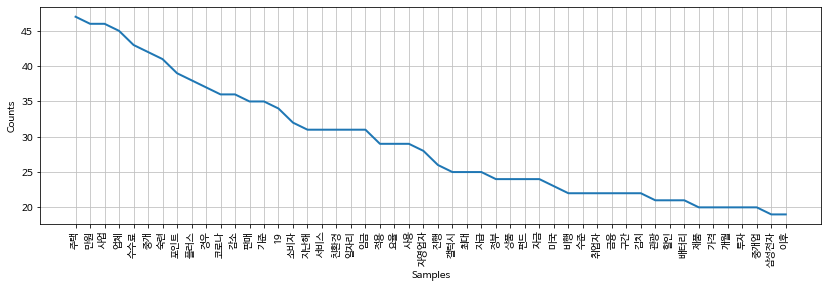

In [ ]:
news.plot(50)

## count

In [ ]:
news.count('가격')

20

## Dispersion plot
단어가 등장하는 위치를 Word Offset에 따라 배치하여 시각화

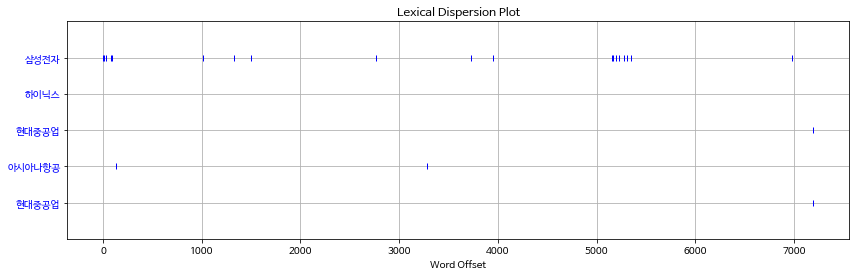

In [ ]:
news.dispersion_plot(['삼성전자', '하이닉스', '현대중공업', '아시아나항공', '현대중공업'])

# Concordance

Concordance (색인): 단어가 쓰인 문맥을 모두 찾아준다

In [ ]:
news.concordance('하이닉스', lines=10)

No matches


# Similar word

주어진 단어와 비슷한 환경(same context)에서 쓰인(≠비슷한 뜻) 단어들

In [ ]:
news.similar('갤럭시')

삼성전자 플립 노트


In [ ]:
news.similar('친환경')

진출 완전


In [ ]:
news.similar('일자리')

지난해 직종


# common_contexts

for two words used in similar contexts

In [ ]:
news.common_contexts(['단어A', '단어B'])

('The following word(s) were not found:', '단어a 단어b')


# Collocations
연어(連語, collocation): 함께 위치하는 단어들 (co + location), 어휘의 조합 또는 짝을 이루는 단어

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
news.collocations()

고용원 자영업자; 에너지 솔루션; 브라운 에디션; 플러그인 하이브리드; 가맹점 금융사; 자동차 전문지; 지난해 12월; 스포츠
유틸리티; 중개업 소비자; 국토부 토론회; 김종진 한국노동사회연구소; 사업체 노동력; 이산화탄소 배출량; 판매자 청와대;
갤럭시 시리즈; 근로자 월평균; 주유소 인프라; 통계청 마이크로; 세그먼트 판매량; 신용카드 하반기


# PoS Tagging 


In [ ]:
from konlpy.tag import Kkma

engine = Kkma() 
news_tags = engine.pos(news_text)
print(news_tags[:100])

[('삼성전자', 'NNG'), ('가', 'JKS'), ('패션', 'NNG'), ('브랜드', 'NNG'), ('톰', 'UN'), ('브라운', 'NNG'), ('과', 'JKM'), ('함께', 'MAG'), ('만들', 'VV'), ('ㄴ', 'ETD'), ('폴', 'NNG'), ('더블', 'NNG'), ('폰', 'NNG'), ('한정판', 'NNG'), ('응모', 'NNG'), ('에', 'JKM'), ('9', 'NR'), ('시간', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('46', 'NR'), ('만', 'NR'), ('명', 'NNM'), ('이', 'JKS'), ('몰리', 'VV'), ('ㄴ', 'ETD'), ('것', 'NNB'), ('으로', 'JKM'), ('나타나', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('15', 'NR'), ('일', 'NNM'), ('삼성전자', 'NNG'), ('는', 'JX'), ('지나', 'VV'), ('ㄴ', 'ETD'), ('12', 'NR'), ('일', 'NNM'), ('오전', 'NNG'), ('9', 'NR'), ('시', 'NNM'), ('부터', 'JX'), ('오후', 'NNG'), ('6', 'NR'), ('시', 'NNM'), ('까지', 'JX'), ('삼성', 'NNG'), ('닷컴', 'NNG'), ('홈페이지', 'NNG'), ('에서', 'JKM'), ('진행', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('‘', 'SS'), ('개', 'VV'), ('ㄹ', 'ETD'), ('럭', 'UN'), ('시', 'NNG'), ('Z', 'OL'), ('폴드', 'UN'), ('3', 'NR'), ('·', 'SP'), ('플', 'UN'), ('립', 'NNG'), ('3', 'NR'), ('톰', 'UN'), ('브라운', 'NNG'), ('에', 'JKM'), ('디',

# Chunking

In [ ]:
from konlpy.tag import Kkma

engine = Kkma() 

text = '지구는 정말 아름다운 별이다.'
tags = engine.pos(text)

parser = nltk.RegexpParser("NP: {<Adjective>*<Noun>*}")
tree = parser.parse(tags)
tree

# Colab에서는 출력되지 않습니다

In [ ]:
tree.pprint()

(S 지구/NNG 는/JX 정말/MAG 아름답/VA ㄴ/ETD 별/NNG 이/VCP 다/EFN ./SF)


## Summary
* Tokenize - engine.morphs()
* nltk.Text() 
* 빈도 분포, count, Dispersion plot
* Concordance(색인)
* Similar word (same context)
* common_contexts
* Collocations (연어)
* PoS Tagging
* Chunking
* 명사 추출 engine.nouns()

***2017-2021 FinanceData.KR http://financedata.kr***